비지도 학습

-알고 있는 출력이나 정보없이 학습 알고리즘을 훈련

-입력 데이터만으로 데이터에서 지식 추출

-데이터를 잘 이해하기 위해 사용

1. 차원축소  ( 꼭 필요한 특성만 포함)
2. 데이터를 구성하는 단위나 성분 찾기 (많은 텍스트 문서에서 주제 찾기)

*군집
-데이터를 비슷한 것끼리 묶는다.



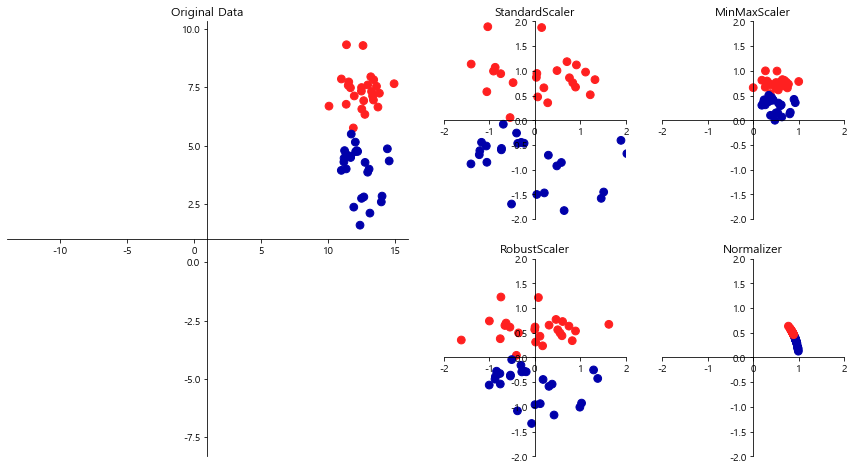

In [40]:
import mglearn

#데이터셋의 스케일을 조정하거나 전처리하는 여러 방법 예제
mglearn.plots.plot_scaling()

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#cancer 데이터를 cancer 변수에 저장한다.
cancer = load_breast_cancer()

#cancer 데이터를 훈련, 테스트 셋으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state = 1)
#훈련, 테스트 셋이 75:25 비율로 잘 나뉘어졌는지 확인한다.
print(X_train.shape)
print(X_test.shape)


(426, 30)
(143, 30)


In [42]:
#전처리가 구현된 파이썬 클래스(민맥스스케일러)를 임포트 한다.
from sklearn.preprocessing import MinMaxScaler

#scaler객체를 생성하고 모델을 저장한다.
scaler = MinMaxScaler()

#훈련 데이터를 학습시킨다.
scaler.fit(X_train)

MinMaxScaler()

In [43]:
#데이터 변환
X_train_scaled = scaler.transform(X_train)

#데이터를 변환해도 크기는 변하지 않는 것을 확인할 수 있다. -> 데이터값만 바뀜
print("변환된 후 크기 : {}\n".format(X_train_scaled.shape))

#스케일이 조정된 후 데이터셋의 속성을 출력합니다.
print("스케일 조정 전 특성별 최솟값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최솟값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최댓값:\n {}".format(X_train_scaled.max(axis=0)))


변환된 후 크기 : (426, 30)

스케일 조정 전 특성별 최솟값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [44]:
#테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)

print("스케일 조정후 특성별 최솟값:\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정후 특성별 최댓값:\n{}".format(X_test_scaled.max(axis=0)))

#값을 보면 훈련세트와 다르게 스케일 조정한 값이 0, 1 이 아니고 심지어는 0~1을 벗어난
# 값도 있는것을 확인할 수 있다.
#MinMaxScaler는 훈련, 테스트 세트를 같은 변환을 적용해야 한다.


스케일 조정후 특성별 최솟값:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정후 특성별 최댓값:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [45]:
#multi class -> a 아니면 나머지 , b 아니면 나머지  , (이진)
#(NB, KNN, DT, Logistic)

#mulitnomial -> a,b,c, 중 한가지를 선택'
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn

#한글을 출력하기 위한 import
#한글 font를 설정해준다.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

import matplotlib as mpl # -깨짐 현상을 해결하기 위햏 matplotlib을 import
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐 현상을 해결하기 위한 구문


스케일 조정후 특성별 최솟값:
[0.52670484 0.10294512]
스케일 조정후 특성별 최댓값:
[0.95397284 0.76554432]
스케일 나쁜조정후 특성별 최솟값:
[0. 0.]
스케일 나쁜조정후 특성별 최댓값:
[1. 1.]


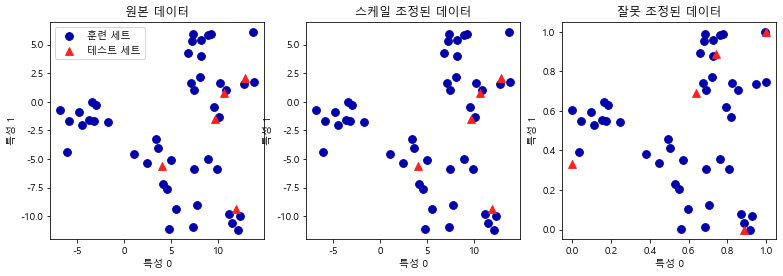

In [46]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
#인위적인 데이터 셋 생성
X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)

#훈련, 테스트 셋으로 나눔
X_train, X_test = train_test_split(X,random_state = 5, test_size = .1)

#훈련 세트와 테스트 세트 산점도를 그린다.
fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0), label='훈련 세트', s= 60)
axes[0].scatter(X_test[:,0], X_test[:,1],marker = '^', c=mglearn.cm2(1), label='테스트 세트', s= 60)
axes[0].legend(loc='upper left')
axes[0].set_title('원본 데이터')

#MinMaxScaler를 사용해 스케일을 조정한다.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#스케일이 조정된 훈련,테스트 세트 산점도를 그린다.
axes[1].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0), label='훈련 세트', s= 60)
axes[1].scatter(X_test[:,0], X_test[:,1],marker = '^', c=mglearn.cm2(1), label='테스트 세트', s= 60)
axes[1].set_title('스케일 조정된 데이터')

#테스트 세트의 스케일을 따로 조정한다.
#테스트 세트의 최솟값은 0, 최댓값은 1이 됨
#이렇게 하면 안되는 거임 , 예시를 위해서 하는 것
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

print("스케일 조정후 특성별 최솟값:\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정후 특성별 최댓값:\n{}".format(X_test_scaled.max(axis=0)))

#스케일 조정을 다르게 한 경우 테스트 세트 범위는 0과 1로 맞춰졌지만
#훈련 세트와 스케일이 다르게 조정도었기 때문에 훈련세트와 다른 비율로 이동하였음.
#그래서 3번째 그래프가 뒤죽박죽인것을 확인할 수 있따.
print("스케일 나쁜조정후 특성별 최솟값:\n{}".format(X_test_scaled_badly.min(axis=0)))
print("스케일 나쁜조정후 특성별 최댓값:\n{}".format(X_test_scaled_badly.max(axis=0)))


#잘못 조정된 훈련,테스트 세트의 산점도를 그린다.
#테스트 세트 점들이 튀는 것을 확인할 수 있음.
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:,1],c=mglearn.cm2(0),label='훈련 세트', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:,1],marker = '^',c=mglearn.cm2(1),label='테스트 세트', s=60)
axes[2].set_title("잘못 조정된 데이터")


for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    

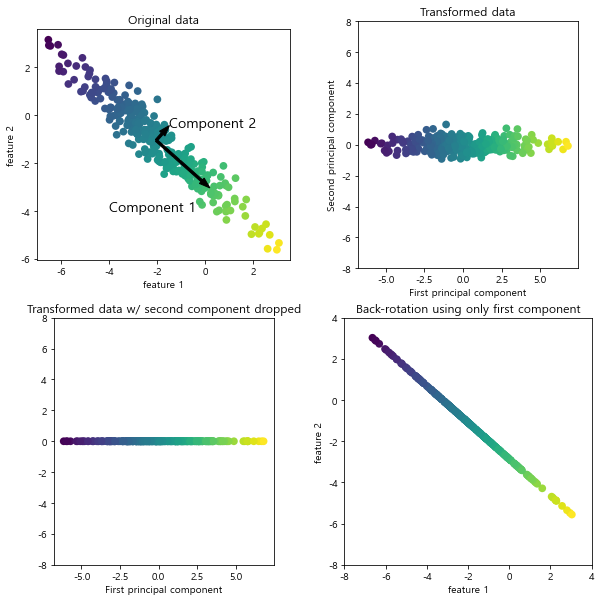

In [47]:
#주성분 분석 (PCA)

mglearn.plots.plot_pca_illustration()

#첫번째 (왼쪽위)
#Component1(성분1)이라고 쓰여있는 분산이 가장 큰 방향을 찾는다. (데이터에서 가장 많은 정보를 담고 있는 방향)
#성분1과 직각이면서 가장 많은 정보를 갖고 있는 '성분2' 방향을 찾는다.
#이런 주된 분산의 방향을 '주성분'이라고 한다. 일반적으로 원본 특성의 개수만큼의 주성분이 있음.

#두번째 (오른쪽 위)
#같은 데이터지만 주성분1과 2를 각각 x, y 축에 나란하도록 회전한 그래프.

#세번째 (왼쪽 아래)
#주성분1 만 유지하도록한다. 2차원->1차원으로 변화된것을 확인

#네번째 (오른쪽 아래)
#주성분1 정보만 담고 있다. 3번쨰에 평균을 더해서 반대로 회전시켰다고 함.

In [52]:
#주성분 분석
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components = 2)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))


원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

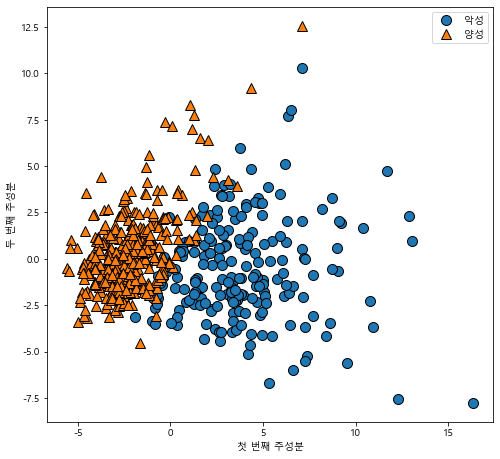

In [53]:
#처음 두 개의 주성분을 사용해 그린 유방암 데이터셋의 2차원 산점도

#그래프 사이즈 (8,8)
plt.figure(figsize = (8,8))

#x축은 X_pca 0번째 y축은 1번째, cancer.target값 이용
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)

#설명란 악성 양성, 위치는 자동으로
plt.legend(["악성","양성"], loc = 'best')

plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [54]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))
#(2,30)
# 행 : 주성분 2개 
# 열 : 원본 데이터의 특성에 대응하는 값 -> 30개의 값

PCA 주성분 형태: (2, 30)


In [55]:
print("PCA 주성분 :\n {}".format(pca.components_))

PCA 주성분 :
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

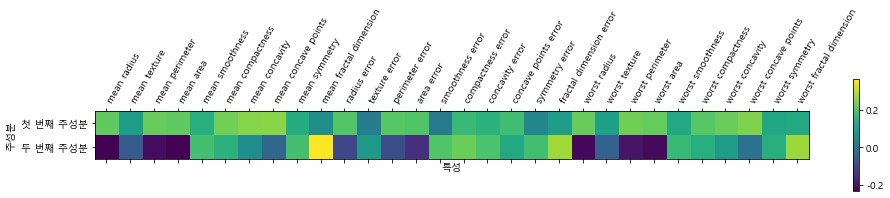

In [56]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha = 'left')
plt.xlabel("특성")
plt.ylabel("주성분")

#첫번째 주성분 은 모두 양수로 부호가 같다.  -> 모든 특성 사이에 공통 상호관계가 있따.
#따라서 한 특성의 값이 커지면 다른값들도 같이 높아질 것이다.

#두번째 주성분은 부호가 섞여 있고 두 주성분 모두 30개의 특성이 있다.
#모든 특성이 섞여 있기 때문에 축이 가지는 의미를 설명하기가 쉽지 않다.

비음수 행렬 분해(NMF)

-유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘
-PCA와 비슷하고 차원 축소에도 사용할 수 있다.

PCA는 데이터의 분산이 가장 크고 수직인 성분을 찾았다.

NMF는 음수가 아닌 성분과 계수값을 찾는다. 즉, 주성분과 계수가 모두 0보다 크거나 같아야 함 -> 음수가 아닌 데이터에만 적용할 수 있음.


C:\Users\12zzz\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\12zzz\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NameError: name 'LogisticRegression' is not defined

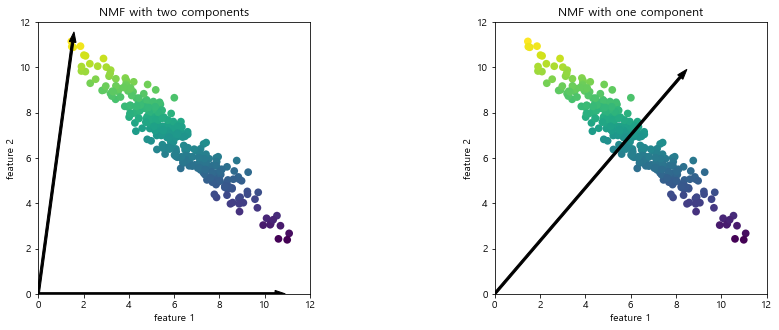

In [61]:
mglearn.plots.plot_nmf_illustration()

#첫번째 그래프 (성분이 2개)
#데이터 셋의 모든 포인트를 양수로 이뤄진 두개의 성분으로 표현할 수 있다.
#데이터를 완벽하게 재구성할 수 있을 만큼 성분이 아주 많다면, 알고리즘은 데이터의 
#각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것이다.

#두번째 크래프 (성분이 1개)
#데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만든다.
#PCA와는 반대로 성분 개수를 줄이면 특정 방향이 제거되는 것뿐 아니라 전체 성분이 바뀐다.
#즉 모든 성분을 동등하게 취급한다.


Text(0, 0.5, '신호')

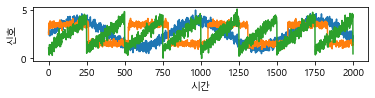

In [63]:
S  = mglearn.datasets.make_signals()
plt.figure(figsize = (6,1))
plt.plot(S, '-')
plt.xlabel('시간')
plt.ylabel('신호')

#원본 신호가 아니라 세개의 신호가 합쳐진것을 볼 수 있다.
#그래서 원본 신호를 보기 위해 분류를 해야한다.

In [64]:
#원본 데이터를 사용해 100개의 측정 데이터를 만든다.
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))

측정 데이터 형태: (2000, 100)


In [67]:
from sklearn.decomposition import NMF 
from sklearn.decomposition import PCA

nmf = NMF(n_components = 3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))

pca = PCA(n_components = 3)
H = pca.fit_transform(X)

복원한 신호 데이터 형태: (2000, 3)


C:\Users\12zzz\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


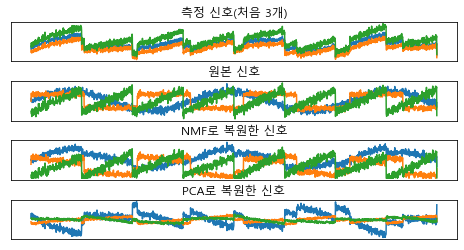

In [68]:
models = [X, S, S_, H]
names = ['측정 신호(처음 3개)', '원본 신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize = (8,4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    
#NMF는 원본신호를 잘 복원 했다.
#하지만 생성한 성분은 순서가 없음에 유념해야 한다. 
#이 예제에서는 NMF성분의 순서가 원본가 우연의 일치로 맞는것 뿐이다.

#PCA는 원복 복원에 실패했다. 
#데이터 변동의 대부분을 첫번째 성분을 사용해 나타냈다.

매니폴드 알고리즘

-시각화가 목적인 알고리즘 (3개 이상의 특성을 뽑는 경우는 거의 없다.)

- 테스트 세트에는 적용할 수 없고 훈련했던 데이터만 변환할 수 있다.

- 탐색적 데이터 분석에 유용하지만 지도학습용으로는 거의 사용하지 않는다.

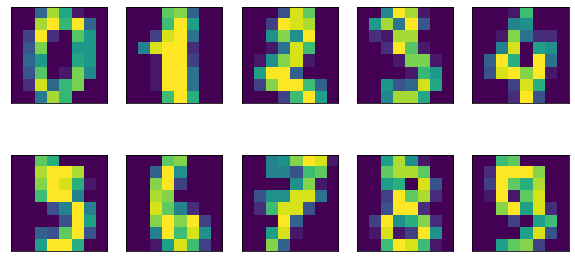

In [69]:
#숫자 데이터를 import해서 digits에 저장한다.
from sklearn.datasets import load_digits
digits = load_digits()

#(2,5) 행렬의 그래프를 그린다.
fig, axes = plt.subplots(2,5, figsize = (10,5), subplot_kw={'xticks':(),
                                                           'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0.5, 0, '두 번째 주성분')

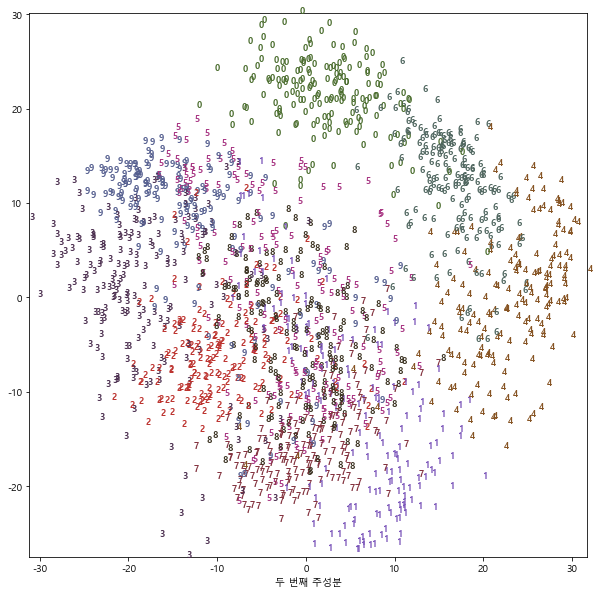

In [72]:
#PCA를 사용해 데이터를 2차원으로 축소해 시각화한다.
#처음 두개의 주성분을 이용해 그래프를 그리고 각 샘플을 해당하는 클래스의 숫자로 나타낸다.

#주성분 두개로 pca적용한뒤 숫자셋을 학습시킨다.
pca = PCA(n_components=2)
pca.fit(digits.data)

#스케일한 digit데이터를 digit_pca에 저장한다.
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
         "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

#그래프 크기
plt.figure(figsize=(10,10))

#x축 범위 pca최솟값 ~ 최댓값, pca[1] 최솟값 ~ 최댓값
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

#해당 위치에 숫자 text로 그래프를 표현한다.
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel("첫 번째 주성분")
plt.xlabel("두 번째 주성분")

#0, 4, 6은 비교적 잘 분리된걸 확인할 수 있지만 나머지는 많이 겹쳐있는것을 확인할 수 있음


Text(0.5, 0, 't-SNE 특성 1')

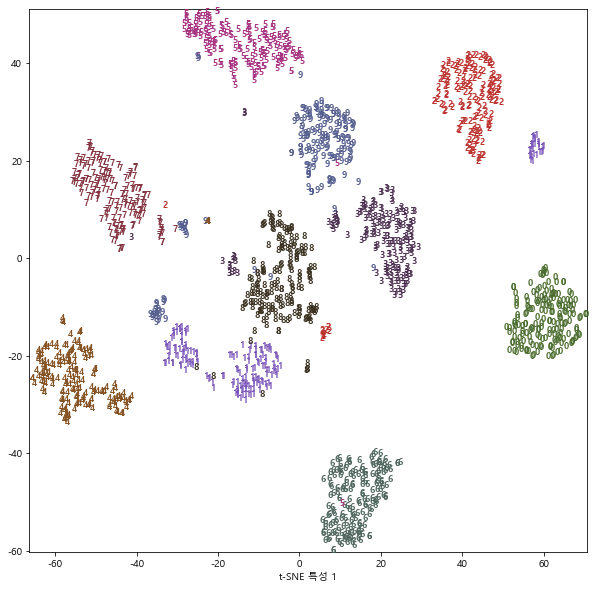

In [75]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state= 42)

#위의 데이터셋에 TSNE를 적용한다.
digits_tsne = tsne.fit_transform(digits.data)

#그래프의 사이즌 (10,10) , X축, Y축 범위 설정
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

#TSNE를 설정한 데이터셋을 그래프에 출력한다.
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), 
            color = colors[digits.target[i]], fontdict = {'weight': 'bold','size':9})
plt.xlabel("t-SNE 특성 0")
plt.xlabel("t-SNE 특성 1")


모든 클래스가 확실히 잘 구분 된것을 확인할 수 있다.
1과 9는 조금 나누어졌지만 대부분의 숫자는 하나의 그룹으로 모여 있다.

T-SNE는 매개변수를 약간 조정해야 하지만 기본값으로도 잘 작동하는 경우가 많다.